In [1]:
# Install the necessary libraries for implementing DL: after launching this cell, restart kernel
!pip3 install --user keras scikit-learn pandas opencv-python

     |████████████████████████████████| 378kB 1.9MB/s eta 0:00:01
     |████████████████████████████████| 7.1MB 22.5MB/s eta 0:00:01
     |████████████████████████████████| 10.0MB 24.1MB/s eta 0:00:01
     |████████████████████████████████| 28.2MB 35.2MB/s eta 0:00:01
     |████████████████████████████████| 276kB 32.9MB/s eta 0:00:01
     |████████████████████████████████| 296kB 32.2MB/s eta 0:00:01
     |████████████████████████████████| 512kB 30.3MB/s eta 0:00:01
Failed to build pyyaml
    Running setup.py install for pyyaml ... done
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
# import the necessary packages

from keras.preprocessing.image import ImageDataGenerator
from keras.applications import MobileNet
from keras.layers import Input, AveragePooling2D, GlobalAveragePooling2D, Dense, Flatten, Dropout
from keras.models import Model, Sequential
from keras.optimizers import Adam, SGD, RMSprop, Adagrad
from keras import regularizers
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils

seed = 72
np.random.seed(seed)
#import cv2

Using TensorFlow backend.


In [6]:
# Allocate specific GPU memory fraction for the current session to avoid memory fails

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.25
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1752: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [7]:
# Load data: images and labels

data = []
labels = []

In [8]:
data = np.array(np.load("../data/all_images_kimeye_224.npy"))
labels = np.array(np.load("../data/all_labels_kimeye.npy"))
labels = labels.astype(int)

In [5]:
data2 = np.array(np.load("../data/all_images_acrima.npy"))
labels2 = np.array(np.load("../data/all_labels_acrima.npy"))
labels2 = labels2.astype(int)

In [6]:
"""
data = np.concatenate((data1, data2), axis=0)
labels = np.concatenate((labels1, labels2), axis=0)

print(data.shape)
print(labels[0])
"""

'\ndata = np.concatenate((data1, data2), axis=0)\nlabels = np.concatenate((labels1, labels2), axis=0)\n\nprint(data.shape)\nprint(labels[0])\n'

In [6]:
# shuffle the whole dataset

shuffle = list(zip(data, labels))
np.random.seed(seed)
np.random.shuffle(shuffle)
data = np.array([shuffle[i][0] for i in range(len(shuffle))])
labels = np.array([shuffle[i][1] for i in range(len(shuffle))])
del shuffle


In [9]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()
#labels = lb.fit_transform(labels)
labels = np_utils.to_categorical(labels)

data = np.array(data)
print(labels)
#labels = np.array(labels)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [9]:
"""
plt.imshow(data[254])
plt.show()
print(labels[254])

plt.imshow(data[1])
plt.show()
print(labels[1])
"""

'\nplt.imshow(data[254])\nplt.show()\nprint(labels[254])\n\nplt.imshow(data[1])\nplt.show()\nprint(labels[1])\n'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


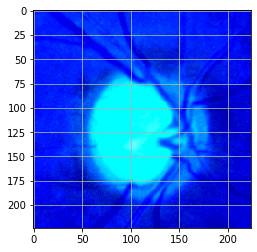

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0. 1.]


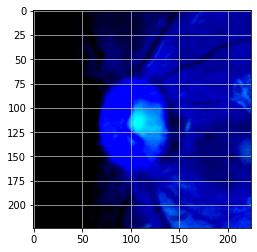

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1. 0.]


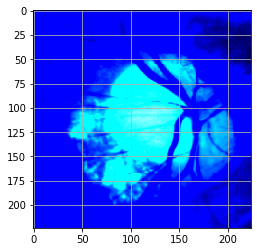

[0. 1.]


In [10]:
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, 
	test_size=0.2, random_state=seed)

plt.grid(None)

plt.imshow(trainX[10])
plt.show()
print(trainY[10])

plt.grid(None)

plt.imshow(testX[80])
plt.show()
print(testY[80])

plt.grid(None)

plt.imshow(testX[96])
plt.show()
print(testY[96])

In [11]:
# initialize the training data augmentation object

trainAug = ImageDataGenerator(
	rotation_range=40,
	zoom_range=0.2,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.2,
	horizontal_flip=True,
	vertical_flip=True,
	fill_mode="nearest")

# initialize the validation/testing data augmentation object (which
# we'll be adding mean subtraction to)
valAug = ImageDataGenerator()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Labels: [array([0., 1.], dtype=float32), array([0., 1.], dtype=float32), array([0., 1.], dtype=float32), array([0., 1.], dtype=float32), array([0., 1.], dtype=float32), array([0., 1.], dtype=float32), array([0., 1.], dtype=float32), array([0., 1.], dtype=float32)]


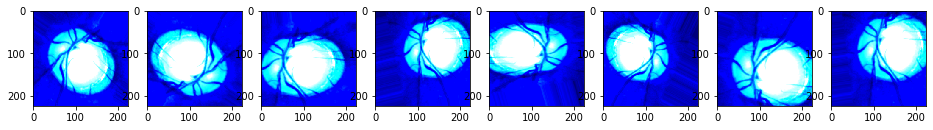

In [12]:
# visualize the different geometric transformations operated to the images

img_id = 600
cat_generator = trainAug.flow(trainX[img_id:img_id+1], 
 trainY[img_id:img_id+1], 
 batch_size=1) 
cat = [next(cat_generator) for i in range(0,8)]
fig, ax = plt.subplots(1,8, figsize=(16, 6))

print('Labels:', [item[1][0] for item in cat]) 
l = [ax[i].imshow(cat[i][0][0]) for i in range(0,8)]

In [23]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [28]:
def create_model(dropout_rate, learn_rate):
    
    baseModel = MobileNet(weights="imagenet", include_top=False, 
                          input_tensor=Input(shape=(224, 224, 3)))
    
    # construct the head of the model that will be placed on top of the
    # the base model
    headModel = baseModel.output

    headModel = GlobalAveragePooling2D()(headModel)

    # let's add a fully-connected layer
    dropout_rate = 0.0

    headModel = Dropout(dropout_rate)(headModel)
    headModel = Dense(2, activation="softmax")(headModel)
 
    # place the head FC model on top of the base model (this will become
    # the actual model we will train)
    model = Model(inputs=baseModel.input, outputs=headModel)
    
    print(1)
    # loop over all layers in the base model and freeze them so they will
    # *not* be updated during the first training process
    for layer in baseModel.layers:
        layer.trainable = False

    opt = SGD(lr=learn_rate, momentum=0.9)

    model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
    opt_name, _ = str(opt)[18:].split(' ', 1)
    print(opt_name)
    
    return model


In [29]:
model = KerasClassifier(build_fn=create_model, batch_size=8, epochs=80, verbose=0)

In [30]:
learn_rate = [1e-4, 5e-5, 1e-5, 5e-6, 1e-6]
dropout_rate = [0.2, 0.3, 0.4, 0.5]
#learn_rate = [1e-3, 5e-4]
#momentum = [0.6, 0.8, 0.9]

In [ ]:
param_grid = dict(dropout_rate=dropout_rate, learn_rate=learn_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=10)
grid_result = grid.fit(trainX, trainY)

1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SGD
1
SG

In [27]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.652263 using {'learn_rate': 0.0005, 'momentum': 0.9}
0.616343 (0.082658) with: {'learn_rate': 0.001, 'momentum': 0.4}
0.622813 (0.082633) with: {'learn_rate': 0.001, 'momentum': 0.6}
0.636503 (0.069714) with: {'learn_rate': 0.001, 'momentum': 0.8}
0.596085 (0.060594) with: {'learn_rate': 0.001, 'momentum': 0.9}
0.580258 (0.069030) with: {'learn_rate': 0.0005, 'momentum': 0.4}
0.645037 (0.090909) with: {'learn_rate': 0.0005, 'momentum': 0.6}
0.642284 (0.084872) with: {'learn_rate': 0.0005, 'momentum': 0.8}
0.652263 (0.048299) with: {'learn_rate': 0.0005, 'momentum': 0.9}
0.550761 (0.087738) with: {'learn_rate': 0.0001, 'momentum': 0.4}
0.539949 (0.074423) with: {'learn_rate': 0.0001, 'momentum': 0.6}
0.576650 (0.080999) with: {'learn_rate': 0.0001, 'momentum': 0.8}
0.609066 (0.091929) with: {'learn_rate': 0.0001, 'momentum': 0.9}
0.537087 (0.055270) with: {'learn_rate': 5e-05, 'momentum': 0.4}
0.573037 (0.110864) with: {'learn_rate': 5e-05, 'momentum': 0.6}
0.532749 (0.041587) w

In [11]:
# show a summary of the base model
print("[INFO] summary for base model...")
print(baseModel.summary())

[INFO] summary for base model...
Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (B

In [52]:
baseModel = MobileNet(weights="imagenet", include_top=False, 
                      input_tensor=Input(shape=(224, 224, 3)))

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [53]:
# construct the head of the model that will be placed on top of the
# the base model
layer_index = -1
headModel = baseModel.layers[layer_index].output

headModel = GlobalAveragePooling2D()(headModel)

# let's add a fully-connected layer
hidden_units = 256
#dropout_rate = 0.3

#headModel = Dense(hidden_units, activation='relu')(headModel)
#headModel = Dropout(dropout_rate)(headModel)

headModel = Dense(2, activation="softmax")(headModel)
 
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)

In [54]:
print(len(baseModel.layers))

87


In [55]:
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
   layer.trainable = False

In [56]:
model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

In [57]:
# compile our model (this needs to be done after our setting our
# layers to being non-trainable)
print("[INFO] compiling model...")

lr_ = [1e-4, 5e-5, 1e-5, 5e-6, 1e-6]
batch_ = [8, 12, 16]
opt = ['adam', 'sgd', 'rmsprop']
    
lr = 1e-4
momentum = 0.9
opt = SGD(lr=lr, momentum=momentum)

model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
opt_name, _ = str(opt)[18:].split(' ', 1)
print(opt_name)

[INFO] compiling model...
SGD


In [58]:
epochs = 100
batch_size = 12

# train the head of the network for a few epochs (all other layers
# are frozen) -- this will allow the new FC layers to start to become
# initialized with actual "learned" values versus pure random
print("[INFO] training head...")
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=batch_size),
	steps_per_epoch=len(trainX) // batch_size,
	validation_data=valAug.flow(testX, testY),
	validation_steps=len(testX) // batch_size,
	epochs=epochs)

[INFO] training head...
Epoch 1/100
102/102 [==============================] - 11s 105ms/step - loss: 0.8326 - accuracy: 0.5487 - val_loss: 0.7835 - val_accuracy: 0.4871
Epoch 2/100
102/102 [==============================] - 10s 99ms/step - loss: 0.6880 - accuracy: 0.6549 - val_loss: 0.6900 - val_accuracy: 0.4902
Epoch 3/100
102/102 [==============================] - 10s 98ms/step - loss: 0.6163 - accuracy: 0.7056 - val_loss: 1.1913 - val_accuracy: 0.4692
Epoch 4/100
102/102 [==============================] - 10s 98ms/step - loss: 0.5962 - accuracy: 0.7187 - val_loss: 0.9976 - val_accuracy: 0.5163
Epoch 5/100
102/102 [==============================] - 10s 97ms/step - loss: 0.5562 - accuracy: 0.7310 - val_loss: 1.0543 - val_accuracy: 0.4923
Epoch 6/100
102/102 [==============================] - 10s 97ms/step - loss: 0.5225 - accuracy: 0.7612 - val_loss: 1.0679 - val_accuracy: 0.4563
Epoch 7/100
102/102 [==============================] - 10s 95ms/step - loss: 0.5469 - accuracy: 0.7612 - 

KeyboardInterrupt: 

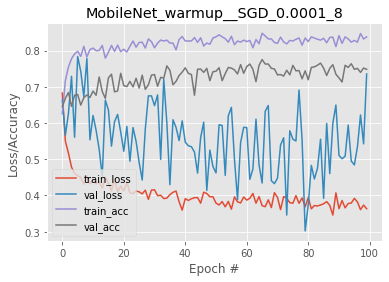

In [51]:
# plot the training loss and accuracy

N = epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
title = "MobileNet_warmup_" + '_' + opt_name + '_' + str(lr) + '_' + str(batch_size)
plt.title(title)
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig('../evaluation/MobileNet/plots/' + title + '_150.png')

In [66]:
# evaluate the network

print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=batch_size)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1)))


[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.95      0.46      0.62       167
           1       0.61      0.97      0.75       142

    accuracy                           0.70       309
   macro avg       0.78      0.72      0.68       309
weighted avg       0.79      0.70      0.68       309



In [165]:
score = model.evaluate(testX, testY,batch_size=batch_size, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5804545439562752
Test accuracy: 0.7411003112792969


In [77]:
model.save_weights("../models/MobileNet/weights_" + title + ".h5")

In [78]:
baseModel2 = MobileNet(weights=None, include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

layer_index = -1
headModel2 = baseModel2.layers[layer_index].output
headModel2 = GlobalAveragePooling2D()(headModel2)

# let's add a fully-connected layer
#dropout_rate = 0.5

headModel2 = Dropout(dropout_rate)(headModel2)
headModel2 = Dense(2, activation="softmax")(headModel2)
 
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model2 = Model(inputs=baseModel2.input, outputs=headModel2)

In [79]:
model2.load_weights("../models/MobileNet/weights_MobileNet_warmup__SGD_0.0001_12.h5")

In [80]:
for layer in model2.layers:
   layer.trainable = True

In [82]:
lr = 1e-4
momentum = 0.9
decay=1e-6
opt = SGD(lr=lr, momentum=momentum)
opt_name, _ = str(opt)[18:].split(' ', 1)
print(opt_name)

model2.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

SGD


In [81]:
model2.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

In [83]:
# initialize the training data augmentation object

trainAug2 = ImageDataGenerator(
	rotation_range=30,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

# initialize the validation/testing data augmentation object (which
# we'll be adding mean subtraction to)
valAug2 = ImageDataGenerator()


In [84]:
epochs = 150
batch_size = 12

# train the head of the network for a few epochs (all other layers
# are frozen) -- this will allow the new FC layers to start to become
# initialized with actual "learned" values versus pure random
print("[INFO] training network...")
H = model.fit_generator(
	trainAug2.flow(trainX, trainY, batch_size=batch_size),
	steps_per_epoch=len(trainX) // batch_size,
	validation_data=valAug2.flow(testX, testY),
	validation_steps=len(testX) // batch_size,
	epochs=epochs)


[INFO] training network...
Epoch 1/150
102/102 [==============================] - 16s 152ms/step - loss: 0.3823 - accuracy: 0.8275 - val_loss: 0.5459 - val_accuracy: 0.7532
Epoch 2/150
102/102 [==============================] - 15s 150ms/step - loss: 0.3602 - accuracy: 0.8340 - val_loss: 0.4102 - val_accuracy: 0.7640
Epoch 3/150
102/102 [==============================] - 15s 148ms/step - loss: 0.3787 - accuracy: 0.8348 - val_loss: 0.5114 - val_accuracy: 0.7468
Epoch 4/150
102/102 [==============================] - 15s 148ms/step - loss: 0.3507 - accuracy: 0.8446 - val_loss: 0.5582 - val_accuracy: 0.7705
Epoch 5/150
102/102 [==============================] - 15s 146ms/step - loss: 0.3515 - accuracy: 0.8430 - val_loss: 0.6151 - val_accuracy: 0.7648
Epoch 6/150
102/102 [==============================] - 15s 145ms/step - loss: 0.3681 - accuracy: 0.8340 - val_loss: 0.5089 - val_accuracy: 0.7458
Epoch 7/150
102/102 [==============================] - 15s 143ms/step - loss: 0.3486 - accuracy: 

KeyboardInterrupt: 

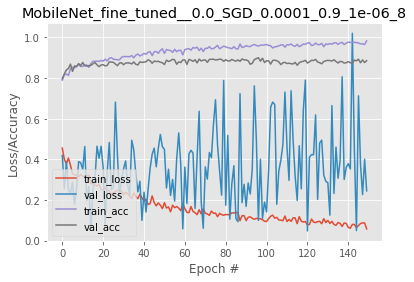

In [41]:
# plot the training loss and accuracy

N = epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
title = "MobileNet_fine_tuned_" + '_' + str(dropout_rate)  + '_' + opt_name + '_' + str(lr) + '_' + str(momentum) + '_' + str(decay) + '_' + str(batch_size)
plt.title(title)
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig('../evaluation/MobileNet/plots/' + title + '.png')

In [42]:
score2 = model.evaluate(testX, testY,batch_size=batch_size, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Test loss: 0.42000681243220517
Test accuracy: 0.8834951519966125


In [44]:
# evaluate the network

print("[INFO] evaluating network...")
predictions2 = model.predict(testX, batch_size=batch_size)
print(classification_report(testY.argmax(axis=1),
	predictions2.argmax(axis=1)))

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.94      0.84      0.89       167
           1       0.83      0.94      0.88       142

    accuracy                           0.88       309
   macro avg       0.89      0.89      0.88       309
weighted avg       0.89      0.88      0.88       309



In [55]:
# save model and architecture to single file
model2.save("../models/MobileNet/model_" + title + ".h5")
print("Saved model to disk")

Saved model to disk
